## Global Annual Population Growth (1951 - 2020)

### About Dataset

The dataset contains the total population and urban population for each year (1951 - 2020) as well as the population growth rate as a percentage. The dataset can be used to study population trends and understand how the global population has changed over time.

### Tabular data includes:

    year
    population
    yearly_growth_percentage
    yearly_growth
    pop_density_km2
    urban_population
    urban_population_percentage


### Import Libraries

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Data Frame

In [121]:
df = pd.read_csv('world-population.csv')
df.sample(5)

,year,population,yearly_growth_percentage,yearly_growth,pop_density_km2,urban_population,urban_population_percentage
42,1993,5581597546,1.50%,82677737,37,2461223528,44%
26,1977,4229506060,1.80%,74839196,28,1616419308,38%
31,1982,4617386542,1.77%,80389780,31,1854134229,40%
57,2008,6789089000,1.24%,83142000,46,3439719000,50%
1,1952,2630861562,1.81%,46827301,18,799282533,30%


### Preprocessing

In [122]:
# Find out the number of values which are not numeric
print(df['year'].astype(str).str.isnumeric().value_counts())
print(df['population'].astype(str).str.isnumeric().value_counts())
print(df['yearly_growth'].astype(str).str.isnumeric().value_counts())
print(df['yearly_growth_percentage'].astype(str).str.isnumeric().value_counts())
print(df['pop_density_km2'].astype(str).str.isnumeric().value_counts())

True    70
Name: year, dtype: int64
True    70
Name: population, dtype: int64
True    70
Name: yearly_growth, dtype: int64
False    70
Name: yearly_growth_percentage, dtype: int64
True    70
Name: pop_density_km2, dtype: int64


In [123]:
#remove "%" to make convert to number
def removePercentage(d):
      return float(d[:-1])/100
df['yearly_growth_percentage']= df['yearly_growth_percentage'].apply(removePercentage)
df['urban_population_percentage']= df['urban_population_percentage'].apply(removePercentage)
df

,year,population,yearly_growth_percentage,yearly_growth,pop_density_km2,urban_population,urban_population_percentage
0,1951,2584034261,0.0188,47603112,17,775067697,0.30
1,1952,2630861562,0.0181,46827301,18,799282533,0.30
2,1953,2677608960,0.0178,46747398,18,824289989,0.31
3,1954,2724846741,0.0176,47237781,18,850179106,0.31
4,1955,2773019936,0.0177,48173195,19,877008842,0.32
...,...,...,...,...,...,...,...
65,2016,7464022000,0.0114,84225000,50,4060653000,0.54
66,2017,7547859000,0.0112,83837000,51,4140189000,0.55
67,2018,7631091000,0.0110,83232000,51,4219817000,0.55
68,2019,7713468000,0.0108,82377000,52,4299439000,0.56


### Visualization

### Descriptive Analytic

In [124]:
#Population average growth over the years in percentage
np.mean(df['yearly_growth_percentage'])*100

1.6164285714285715

### Predict Analytic
##### Why we use Linear Regression
As the population of a country can take any values and not some selected discrete values we realize that this is a regression problem and not a classification problem. Linear Regression is one of the most basic algorithms of Machine Learning. This algorithm lets us predict numerical data. Hence we use Linear Regression to solve this problem.

We normalize the data to scale. And to ease the prediction of growth rate with machine learning.

In [125]:
df = df.drop(['urban_population',
            'urban_population_percentage',
            'yearly_growth_percentage',
            'yearly_growth'],axis=1)
x = df.drop(['population'],axis=1)#get all columns except population
y = df['population'].to_numpy()
normalized_x = preprocessing.normalize(x)# scale X into values between 0 to 1 to have unit norm.
x_train, x_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.3, random_state=101)

We create the model from the Linear regression library
And fit (train) our test data into the model

In [126]:
lm = LinearRegression()
lm.fit(x_train,y_train)# train
predictions = lm.predict(x_test)# predict

Now to see the accuracy of our model we will use the tools of Mean Squared Error and Mean Absolute Error.

ValueError: x and y must be the same size

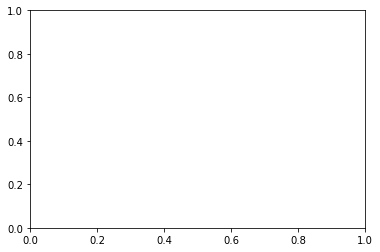

In [127]:
# plt.scatter(x_test,y_test,color='k')
# plt.plot(x_test,predictions,color='b')
# plt.show()